<a href="https://colab.research.google.com/github/JMK-18/statistics-Lecture/blob/main/%5B%ED%86%B5%EA%B3%84%ED%95%99_%ED%8A%B9%EA%B0%95_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC%5D_%EC%B6%94%EC%B2%9C_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추천 시스템 (Recommendation System)

- 친사용자인 동시에 친기업 서비스
- 자신이 몰랐던 취향도 추천해줌. 이러한 추천 시스템을 경험한 사용자는 그 서비스의 충성 고객이 될 확률이 높아짐. 그러면 더욱 더 많은 데이터가 쌓이게 되고 더욱 견고한 서비스가 구축이 됨.

[Reference] https://lsjsj92.tistory.com/563

# 1) 개념 이해

## 추천 시스템의 기본 유형

- Content based Filtering (콘텐츠 기반 필터링) : 초기에 많이 사용
- Collaborative Filtering (협업 필터링) : 메모리 협업 / 필터링 잠재 요인 협업 (현재 많이 사용) 


## 메모리(Memory based) Collaborative Filtering

새로운 영화가 나오면 다른 사람들의 평점이나 평가를 들어본 뒤 영화를 선택하는 경우. **사용자 행동 양식(User Behavior)** 을 기반으로 추천해주는 것이 Collaborative Filtering.

- 목표 : 사용자-아이템 행렬에서 사용자가 아직 평가하지 않은 아이템을 예측

## 행렬 분해(Matrix Factorization) Collaborative Filtering

행렬 분해를 이용한 협업 필터링. 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인(Latent Factor)을 뽑아내는 방법.

아이템 기반 협업 필터링보다 더 많이 사용. 그 이유는? **공간**에 있음!

# 1-1) 전처리

전처리를 마친 최종 엑셀 파일로 2) 알고리즘 구축 진행.
코드 진행 시간+복잡성을 줄이기 위해 해당 부분은 링크 첨부


-> https://github.com/JMK-18/statistics-Lecture/blob/main/%5B%EC%BA%90%EA%B8%80%5D_%EC%9C%A0%ED%8A%9C%EB%B8%8C_%EC%9D%B8%EA%B8%B0_%EB%8F%99%EC%98%81%EC%83%81.ipynb

# 2) 콘텐츠 기반 필터링

- 데이터셋 : https://www.kaggle.com/datasnaek/youtube-new

동일 category내 조회수가 높은 것을 기준으로 추천하는 시스템

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = pd.read_csv("한국 유튜브.csv")
data = data[['video_id','category','views','likes','title','channel_title','description','tags']]
data.head()

,video_id,category,views,likes,title,channel_title,description,tags
0,RxGQe4EeEpA,People & Blogs,156130,1422,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서"""
1,hH7wVE8OlQ0,News & Politics,76533,211,JSA 귀순 북한군 총격 부상,Edward,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상"""
2,9V8bnWUmE9U,People & Blogs,421409,5112,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,퍼가실때 꼭 출처 부탁드려요,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연"""
3,0_8py-t5R80,News & Politics,222850,2093,"???????? 출국 현장, 놓치면 안되는 장면",미디어몽구,다스는 누구겁니까 듣고 난 후 표정,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|..."
4,bk55RbxiQdI,News & Politics,84466,1094,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후"""


## 콘텐츠 기반 필터링 추천

비슷한 콘텐츠를 사용자에게 추천. 여기서 비슷한 콘텐츠란 'category'라고 가정. 

가장 먼저 문자열로 되어 있는 category를 숫자로 바꾸어 벡터화시킴.

In [ ]:
data.category.head(2)

0     People & Blogs
1    News & Politics
Name: category, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

*CountVectorizer
: 단어들의 카운트(출현 빈도(frequency))로 여러 문서들을 벡터화
카운트 행렬, 단어 문서 행렬 (Term-Document Matrix, TDM))
모두 소문자로 변환시키기 때문에 me 와 Me 는 모두 같은 특성이 된다.*

In [ ]:
count_vector = CountVectorizer(ngram_range=(1,3))

In [ ]:
c_vector_category = count_vector.fit_transform(data['category'])
c_vector_category.shape

(13138, 35)

단어를 벡터화시켜서 저장할 수 있게 됨.

이제 각 유튜브 영상의 유사도를 측정하면 된다. 유사도를 측정하면 카테고리가 비슷한 영상이 추천되겠죠? 이 유사도 측정은 코사인 유사도 (cosine similarity)를 사용한다.

get_recommend_youtube_list 라는 이름의 함수 생성:

 1. 코사인 유사도를 이용해 카테고리가 비슷한 영상을 추천
 2. views를 이용해서 views가 높은 것을 기반으로 최종 추천

In [ ]:
category_c_sim = cosine_similarity(c_vector_category, c_vector_category).argsort()[:, ::-1]

In [ ]:
category_c_sim.shape

(13138, 13138)

In [ ]:
def get_recommend_youtube_list(df, youtube_title, top=30):
    # 특정 영상과 비슷한 영상을 추천해야 하기 때문에 '특정 영상' 정보를 뽑아낸다.
    target_youtube_index = df[df['title'] == youtube_title].index.values
    
    #코사인 유사도 중 비슷한 코사인 유사도를 가진 정보를 뽑아낸다.
    sim_index = category_c_sim[target_youtube_index, :top].reshape(-1)
    #본인을 제외
    sim_index = sim_index[sim_index != target_youtube_index]

    #data frame으로 만들고 views으로 정렬한 뒤 return
    result = df.iloc[sim_index].sort_values('views', ascending=False)[:10]
    return result

youtube_title=' '에 내가 시청한 영상의 제목을 입력하면, 이와 동일 카테고리내에서 views가 많은 영상을 우선순위로 30개 영상을 추천함.

In [ ]:
get_recommend_youtube_list(data, youtube_title='JSA 귀순 북한군 총격 부상')

,video_id,category,views,likes,title,channel_title,description,tags
2878,x35N8oTUIZI,News & Politics,80473,1476,문재인대통령 보려고 호텔앞까지 찾아온 중국인들 (중국 충칭시),무마니,https://www.facebook.com/TheBlueHouseKR/\nhttp...,"문재인대통령|""문재인""|""청와대""|""대한민국""|""강경화""|""김상조""|""국회""|""여의..."
9410,oCt4MLzgSQU,News & Politics,79052,303,"유시민, 안희정의 미래는 너무도 창창했다. 03 11",시민의 justice,NaN,[none]
2834,PTOj8nr703I,News & Politics,61383,528,"[MBC최승호 사장] 최승호 사장의 개혁 광풍, 정말 심상치가 않다.",빠른서찰,"[MBC최승호 사장] 최승호 사장의 개혁 광풍, 정말 심상치가 않다.","MBC최승호 사장|""최승호"""
9413,wJt7HoxL5cQ,News & Politics,60387,313,유시민 놀랍다! 왜 유시민이 안희정과 달랐냐면요 클라스의 차이를 느낄 수 밖에,뭉구,NaN,"유시민|""안희정""|""클라스의차이""|""클라스"""
2829,VKC4T5Z_5yM,News & Politics,56966,686,서울 피해없이 북한 700곳 타격 가능하다 | 미국 예방타격 시나리오,소름돋는정치,NaN,"홍준표|""자유한국당""|""류여해""|""미군철수""|""트럼프""|""미국""|""중국""|""시진핑""..."
9347,1EjJsN0Rxw8,News & Politics,53010,337,[이번 안희정 지사 사건을 보듯이 유시민 작가는 안희정 지사와의 클래스는 너무 달랐...,빠른서찰,[이번 안희정 지사 사건을 보듯이 유시민 작가는 안희정 지사와의 클래스는 너무 달랐...,[none]
9411,CB5H8_et-sM,News & Politics,48902,2438,이동복 경고 ''정의용 특사가 김정은 말을 왜곡 전달하면 심유경 꼴 된다.'',조갑제TV,韓美동맹 해체를 의미하는 '한반도 비핵화'를 '북한의 비핵화'인 것처럼 전달하면 트...,[none]
9349,wbg6sAdpN7Q,News & Politics,43895,1801,분통 폭발!!! 3-10 탄핵원흉 헌재 정유9적 장례식 운구행렬,SesameTube 참깨방송,2018년 3월10일 오후 대한애국당 거리행진 대열 후미에 속한 헌법재판소 정미9적...,"운현궁|""접근""|""3-10""|""박근혜 대통령""|""불법탄핵""|""억지탄핵""|""탄핵""|""..."
2835,1qizHVJb9wg,News & Politics,43580,1149,문재인 베이징대 14번 기립박수 대박-시진핑 활짝 웃었다,김초운,많은 분들이 볼 수 있게 좋아요 구독 부탁합니다^^ 꼭 보셔야 할 내용인데요.. 외...,문재인 베이징대
9393,A4QDrFWnvYg,News & Politics,37436,1677,★개미애국방송★ (03/10) [특보] 불법·사기 탄핵 1년! 강력하게 규탄한다! ...,개미애국방송,NaN,"개미애국방송|""개미애국""|""대한애국당""|""태극기집회""|""조원진"""


# 3) 협업 필터링_아이템 기반 

- 데이터셋 : https://www.kaggle.com/sengzhaotoo/movielens-small 
- userid, movieid 등의 필요 요건을 맞춘 데이터를 캐글에서 다운받음. (위의 데이터로 진행할 수 없는 이유)

In [ ]:
rating_data = pd.read_csv("C:/Users/User/Desktop/ratings.csv",encoding = 'cp949')
movie_data = pd.read_csv("C:/Users/User/Desktop/movies.csv", encoding = 'cp949')

In [ ]:
rating_data.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [ ]:
movie_data.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


따로 나뉘어져 있는 평점&영화 데이터 합치기.

-> 공통으로 갖고 있는 칼럼 'movieid'를 기준으로 합치면 된다. (pivot_table로 만들기)

In [ ]:
rating_data.drop('timestamp', axis = 1, inplace=True)
rating_data.head(2)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0


In [ ]:
user_movie_rating = pd.merge(rating_data, movie_data, on = 'movieId')

In [ ]:
user_movie_rating.head(2)

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama


In [ ]:
movie_user_rating = user_movie_rating.pivot_table('rating', index = 'title', columns='userId')
user_movie_rating = user_movie_rating.pivot_table('rating', index = 'userId', columns='title')

In [ ]:
user_movie_rating.head(5)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),징Three Amigos! (1986),캅tiraz캇m Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_user_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
$9.99 (2008),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


하나의 칼럼은 영화, 다른 하나는 사용자.

이 상태에서 먼저 아이템 기반 협업 필터링 (item based collaborative filtering) 진행한다.

일단, NaN값은 0으로 바꿔주기!

In [ ]:
movie_user_rating.fillna(0, inplace = True)
movie_user_rating.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


현재, row가 영화, col이 user로 되어있다.

아이템 기반 협업 필터링은 '00 상품을 구매한 고객들은 다음 상품도 구매했다.' 라는 뜻.
즉, '00 영화를 본 고객들은 이런 영화도 봤다.' 라고 해석할 수 있다.

그리고 그 기반은 평점이 비슷한 것을 기반으로 한다.
이제 그 평점이 비슷하다는 것을 코사인 유사도로 측정해서 확인해보자.

In [ ]:
item_based_collabor = cosine_similarity(movie_user_rating)
item_based_collabor

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.05821787,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.05821787, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
print(movie_user_rating.shape)
print(item_based_collabor.shape)

(9064, 671)
(9064, 9064)


In [ ]:
item_based_collabor = pd.DataFrame(data = item_based_collabor, index = movie_user_rating.index, columns = movie_user_rating.index)

In [ ]:
item_based_collabor.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),징Three Amigos! (1986),캅tiraz캇m Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.000000,0.0,0.0,0.164399,0.020391,0.0,0.014046,0.000000,0.0,0.003166,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
$9.99 (2008),0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.079474,0.0,0.156330,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.013899,0.0,0.058218,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,0.0,1.0,0.000000,0.000000,1.0,0.000000,0.217357,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
'Neath the Arizona Skies (1934),0.164399,0.0,0.0,1.000000,0.124035,0.0,0.085436,0.000000,0.0,0.019259,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
'Round Midnight (1986),0.020391,0.0,0.0,0.124035,1.000000,0.0,0.010597,0.143786,0.0,0.136163,...,0.0,0.0,0.0,0.0,0.121567,0.0,0.000000,0.0,0.000000,0.0


Item 간의 유사도 측정완료!

이제 특정 item에 있어 비슷한 item을 추천해주는 기능을 넣으면 된다.

In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor[title].sort_values(ascending=False)[:6]

In [ ]:
#제목 입력시 유사도가 높은 item 추천
get_item_based_collabor('$9.99 (2008)')

title
$9.99 (2008)                                                 1.000000
Broken Wings (Knafayim Shvurot) (2002)                       0.658145
Mondays in the Sun (Lunes al sol, Los) (2002)                0.658145
Baran (2001)                                                 0.658145
Edge of Heaven, The (Auf der anderen Seite) (2007)           0.658145
Kirikou and the Sorceress (Kirikou et la sorci챔re) (1998)    0.658145
Name: $9.99 (2008), dtype: float64

# 4) 협업 필터링_행렬 분해

- 3)의 데이터와 동일 데이터 사용

In [ ]:
print(movie_data.shape)
print(rating_data.shape)

(9125, 3)
(100004, 3)


## 전처리

In [1]:
rating_data2 = pd.read_csv("C:/Users/User/Desktop/ratings.csv",encoding = 'cp949')
movie_data2 = pd.read_csv("C:/Users/User/Desktop/movies.csv", encoding = 'cp949')

NameError: ignored

In [ ]:
rating_data2.drop('timestamp', axis = 1, inplace = True)
rating_data2.head()

In [ ]:
movie_data2.drop('genres', axis = 1, inplace = True)
movie_data2.head()

In [ ]:
user_movie_data2 = pd.merge(rating_data, movie_data, on = 'movieId')
user_movie_data2.head()

In [ ]:
user_movie_data2.shape

불필요한 칼럼 제거 후, merge를 이용해 하나의 데이터로 합쳤다.

이제, pivot_table을 만들어 줄 차례!

value에는 rating, column에는 movie title, index는 user id를 넣어준다.

In [ ]:
user_movie_rating2 = user_movie_data2.pivot_table('rating', index = 'userId', columns='title').fillna(0)

In [ ]:
user_movie_rating2.shape

In [ ]:
user_movie_rating2.head()

이제 사용자-영화 기준의 데이터를 **영화-사용자** 기준으로 만들어서 특정 영화와 비슷한 영화를 추천해주는 로직을 구현해보자.

In [ ]:
movie_user_rating2 = user_movie_rating2.values.T
movie_user_rating2.shape

In [ ]:
type(movie_user_rating2)

## SVD(Singular Value Decomposition, 특이값 분해) 사용

scikit learn의 TruuncatedSVD를 사용

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [ ]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating2)
matrix.shape

(9064, 12)

In [ ]:
matrix[0]

array([ 0.01227491,  0.00250758,  0.01553936, -0.03400553, -0.01460059,
        0.00372807, -0.00199212,  0.04533481, -0.01619239, -0.02227232,
        0.00988747, -0.00782529])

12개의 component로 차원 축소완료!

이제, 이렇게 나온 데이터를 활용해서 pearson 상관계수를 구하자.

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(9064, 9064)

In [ ]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

<AxesSubplot:>

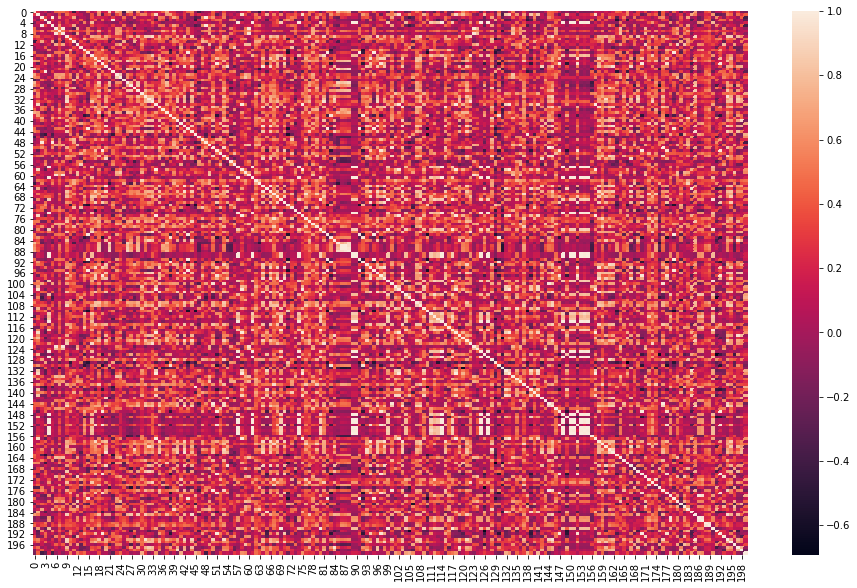

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

이렇게 나온 상관계수를 통해 특정 영화와 상관계수가 높은 영화를 뽑아준다.

In [ ]:
movie_title = user_movie_rating2.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")

In [ ]:
#'가디언즈 오브 갤럭시' 영화를 기준으로 비슷한 영화 뽑기!
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:50]

['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)',
 'Angels & Demons (2009)',
 'Ant-Man (2015)',
 'Avatar (2009)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman: The Dark Knight Returns, Part 1 (2012)',
 'Batman: The Dark Knight Returns, Part 2 (2013)',
 'Battle: Los Angeles (2011)',
 'Bee Movie (2007)',
 'Beowulf (2007)',
 'Big Hero 6 (2014)',
 'Bolt (2008)',
 'Book of Eli, The (2010)',
 'Brave (2012)',
 'Captain America: Civil War (2016)',
 'Captain America: The First Avenger (2011)',
 'Captain America: The Winter Soldier (2014)',
 'Chronicle (2012)',
 'Click (2006)',
 'Cloverfield (2008)',
 'Cop Out (2010)',
 'Crank: High Voltage (2009)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'District 9 (2009)',
 'Dredd (2012)',
 'Drillbit T

아이템 기반 협업 필터링과의 결과 비교

In [ ]:
movie_title = user_movie_rating2.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("$9.99 (2008)")

In [ ]:
corr_coffey_hands  = corr[coffey_hands]
list(movie_title[(corr_coffey_hands >= 0.9)])[:20]

['$9.99 (2008)',
 '12:08 East of Bucharest (A fost sau n-a fost?) (2006)',
 '20,000 Leagues Under the Sea (1916)',
 '25 Watts (2001)',
 '3:10 to Yuma (1957)',
 '49th Parallel (1941)',
 '71 Fragments of a Chronology of Chance (71 Fragmente einer Chronologie des Zufalls) (1994)',
 'A-Haunting We Will Go (1942)',
 'Africa Screams (1949)',
 'Age of Stupid, The (2009)',
 'Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)',
 'American Heart (1992)',
 'Andalusian Dog, An (Chien andalou, Un) (1929)',
 'Anderson Tapes, The (1971)',
 'Animals are Beautiful People (1974)',
 'Art of the Steal, The (2009)',
 'Ashes and Diamonds (Popi처l i diament) (1958)',
 'Aspen (1991)',
 'At War with the Army (1950)',
 'Ballad of Cable Hogue, The (1970)']

In [ ]:
def get_item_based_collabor(title):
    return item_based_collabor[title].sort_values(ascending=False)[:20]

get_item_based_collabor('$9.99 (2008)')

title
$9.99 (2008)                                                                                1.000000
Broken Wings (Knafayim Shvurot) (2002)                                                      0.658145
Mondays in the Sun (Lunes al sol, Los) (2002)                                               0.658145
Baran (2001)                                                                                0.658145
Edge of Heaven, The (Auf der anderen Seite) (2007)                                          0.658145
Kirikou and the Sorceress (Kirikou et la sorci챔re) (1998)                                   0.658145
Riding Alone for Thousands of Miles (Qian li zou dan qi) (2005)                             0.658145
Caramel (Sukkar banat) (2007)                                                               0.658145
Life is a Miracle (Zivot je cudo) (2004)                                                    0.658145
Eagle vs Shark (2007)                                                                